In [2]:
import os
from config import *
def getAverage(array):
    sum = 0
    for x in array:
        sum += float(x)
    avg = sum / len(array)
    return avg

def getMax(array):
    max = 0
    for x in array:
        if float(x) > max:
            max = float(x)
    return max

def getMin(array):
    min = float(array[0])
    for x in array:
        if float(x) < min:
            min = float(x)
    return min

def getImpactPercent(val, ref):
    return 100*((float(val)/float(ref)) -1)

## Training Data Results

In [3]:

##NOTE: Dirs must follow training_*/base_*/run_*

BASEDIR= RESULTS_FOLDER + "results_training/"
outfile = open("results_training.log", "w") # change to a
outfile.write("DVFS\t")
for c in range(6):
    outfile.write("b_C"+str(c)+"_AppId\t")
for c in range(6):
    outfile.write("b_C"+str(c)+"_Instr\t")
    outfile.write("b_C"+str(c)+"_Access\t")
    outfile.write("b_C"+str(c)+"_Misses\t")
outfile.write("b_Eff\t")
for c in range(6):
    outfile.write("a_C"+str(c)+"_AppId\t")
outfile.write("a_Eff\n")

#iterating over all training file results
for training_dir in sorted(os.listdir(BASEDIR)):
    t = os.path.join(BASEDIR, training_dir)
    stat_file = open(t+"/stats.out")
    data = stat_file.readlines()
    for l in data:
        outfile.write(l)
    #if os.path.isdir(t):
        #iterating over each base mapping
        # for base_dir in sorted(os.listdir(t)):  
        #     b = os.path.join(t, base_dir) 
        #     print(b)
            # if os.path.isdir(b): 
            #     #iterating over each run
            #     for run_dir in  sorted(os.listdir(b)):
            #         run = os.path.join(b, run_dir)
            #         print(run)
            #         #iterating over result files
            #         files = sorted(os.listdir(run))
            #         #let the magic happen here
                    
            #         baseline =os.path.join(run, files[0]) 
            #         dvfs =os.path.join(run, files[1])
            #         variants = os.path.join(run, files[2])
                   
            #         var_file = open(variants, "r")
            #         var_data = var_file.readlines()
            #         base_file = open(baseline, "r")
            #         base_data = base_file.readlines()
            #         dvfs_file = open(dvfs, "r")
            #         dvfs_data = dvfs_file.readlines()
                
            #         for line in var_data:
            #             newline = "0\t" + base_data[0][:-1] + "\t" + line
            #             outfile.write(newline)
            #             newline = "1\t" + dvfs_data[0][:-1] + "\t" + line
            #             outfile.write(newline)
            #         var_file.close()
            #         base_file.close()
            #         dvfs_file.close()
outfile.close()
print("Training results generated")

Training results generated


## Motivation/Run-time Results

In [16]:
BASEDIR=RESULTS_FOLDER + "new10/"
#BASEDIR=RESULTS_FOLDER + "results_motiv/"
outfile = open("results_runtime.log", "w")

runs = 10
num_policies = 3

policyAverages = []
policyMin = []
policyMax = []
policies = []

all_effs = [ [0]*runs for i in range(num_policies)]
iterx = 0
#iterating over all  results folder
for result_dir in sorted(os.listdir(BASEDIR)):
    t = os.path.join(BASEDIR, result_dir)
    if os.path.isdir(t):
        policies.append(result_dir[:result_dir.find("_")])
        avg_of_each_run = []
        #iterating over each run mapping
        itery = 0
        for run_dir in sorted(os.listdir(t)):
            run = os.path.join(t, run_dir)
            #iterating over result files
            files = sorted(os.listdir(run))
            eff_file = open(os.path.join(run, files[0]), "r")
            eff_data = eff_file.readlines()
            avg_run = getAverage(eff_data[1:])

            all_effs[iterx] [itery] = avg_run
            avg_of_each_run.append(avg_run)
            eff_file.close()
            itery+=1
        avg_policy = getAverage(avg_of_each_run)
        policyAverages.append(avg_policy)
        #policyMax.append(getMax(avgs))
        #policyMin.append(getMin(avgs))
        iterx+=1
        
print(policies)
print(policyAverages)
#print(policyMax)
#print(policyMin)


impact_eff_avg = []
impact_eff_mins = []
impact_eff_maxs = []
for x in range(1,len(policies)):
    impact_eff_avg.append(getImpactPercent(policyAverages[x],
                                       policyAverages[0]))
    #impact_eff_mins.append(getImpactPercent(policyMin[x],
    #                                   policyMin[0]))
    #impact_eff_maxs.append(getImpactPercent(policyMax[x],
    #                                   policyMax[0]))


print(impact_eff_avg)
outfile.close()
print("Runt-time results generated")


['baseline', 'fixedcore', 'sota']
[1849031516.6511257, 1809518108.3688996, 1741977586.0101287]
[-2.136978625101582, -5.7897299033002785]
Runt-time results generated


backup: 3
backup: 4
backup: 5
bad sota: 5 loss =  -20.25
fixed is: 5 loss =  -18.72
------------>ideal: 6
bad sota: 6 loss =  -21.59
fixed is: 6 loss =  1.29
------------>ideal: 9
bad sota: 9 loss =  -19.02
fixed is: 9 loss =  20.85
sota better than baseline: 4/10
fixed better than sota: 4/10


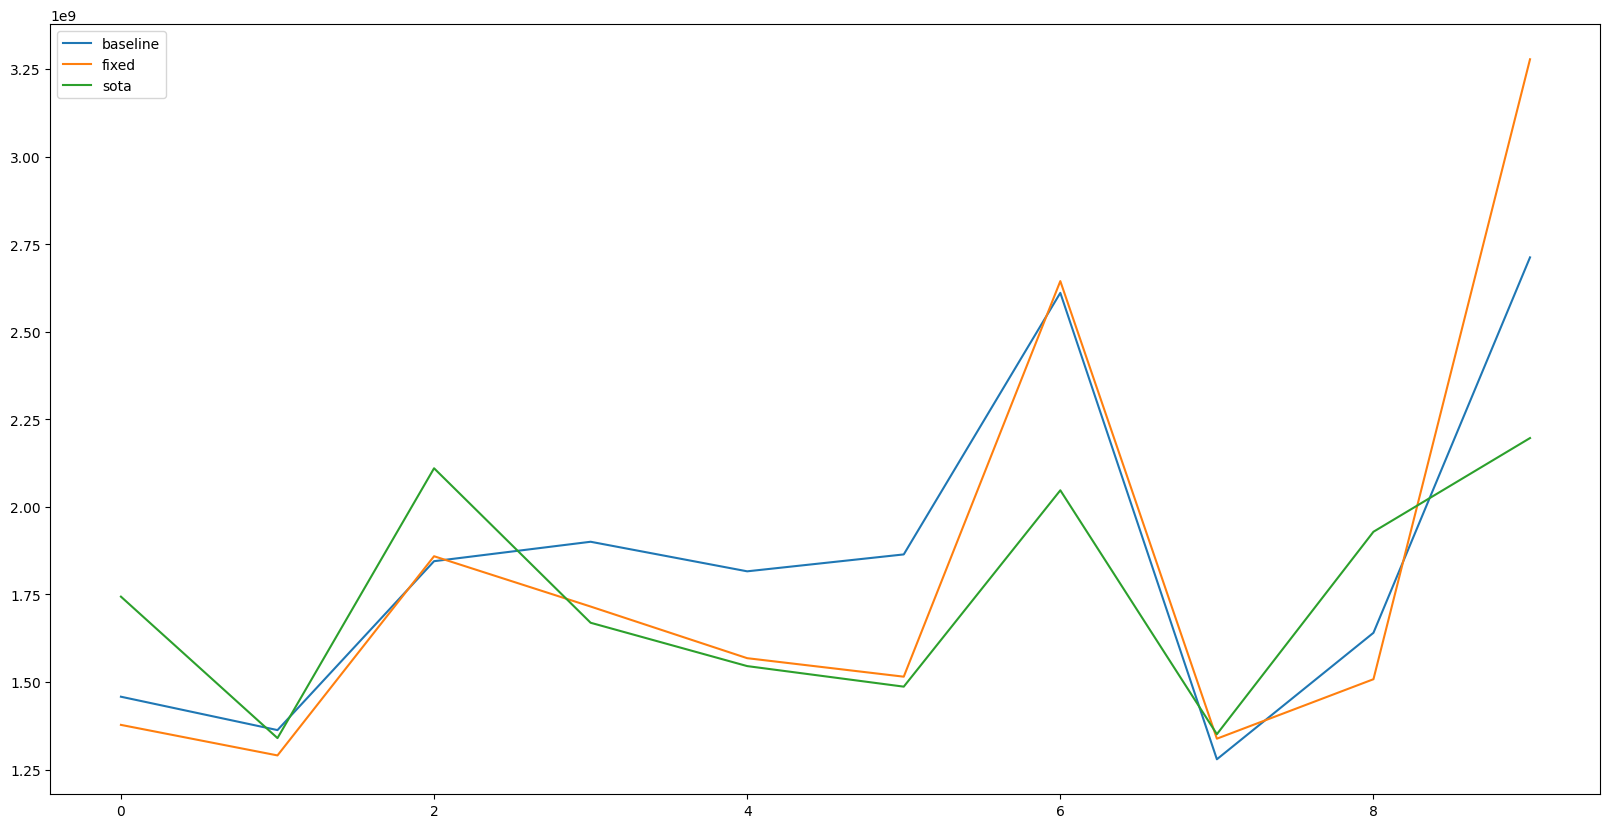

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


s0 =  pd.Series([float(a) for a in all_effs[0]], name='baseline')
s1 =  pd.Series([float(a) for a in all_effs[1]], name='fixed')
s2 =  pd.Series([float(a) for a in all_effs[2]], name='sota')

s = [s0, s1, s2]

df = pd.concat(s,axis=1)
# p = plt.plot(s0)
# p = plt.plot(s1)
# p = plt.plot(s2)
df.plot(figsize=(20,10))

sota_better = 0
fixed_better = 0
for idx in range(len(s0)):

    if (s1[idx] > s0[idx]) & (s0[idx] > s2[idx]):
        print("------------>ideal: " + str(idx))
        #print("loss fixed = ", round(getImpactPercent(s1[idx], s0[idx]),2),"%", " loss sota = ", round(getImpactPercent(s2[idx], s0[idx]),2),"%")
    elif (s1[idx] > s2[idx]) & (s0[idx] > s2[idx]):
        print("backup: " + str(idx))
        loss = round(getImpactPercent(s1[idx], s0[idx]),2)
        #print("loss fixed = ",loss,"%", " loss sota = ",  round(getImpactPercent(s2[idx], s0[idx]),2),"%")
    if (s2[idx] > s0[idx]):
        sota_better+=1
    if (s1[idx] > s0[idx]):
        fixed_better+=1
    loss = round(getImpactPercent(s2[idx], s0[idx]),2)
    loss_fixed = round(getImpactPercent(s1[idx], s0[idx]),2)
    if (loss < -15):
        print("bad sota: " + str(idx), "loss = ", loss, )
        print("fixed is: " + str(idx), "loss = ", loss_fixed, )
print("sota better than baseline: " + str(sota_better)+ "/" + str(len(s0)))
print("fixed better than sota: " + str(fixed_better)+ "/" + str(len(s0)))

In [18]:
# new 10
## 0 is ['spec-astar', 'splash-barnes', 'spec-milc', 'splash-radix', 'spec-zeusmp', './tcc']
## 1 is ['splash-barnes', 'spec-mcf', 'splash-ocean', 'splash-radix', 'spec-gcc', './tcc']
## 2 is ['spec-astar', 'spec-milc', 'splash-raytrace', './tcc', 'spec-h264ref', 'splash-cholesky']
## 3 is ['splash-raytrace', './tcc', 'splash-ocean', 'splash-radix', 'spec-mcf', 'spec-gobmk']
## 4 is ['splash-raytrace', './tcc', 'spec-milc', 'splash-ocean', 'spec-gobmk', 'spec-gcc']
## 5 is ['spec-milc', 'spec-bzip2', './tcc', 'spec-gobmk', 'spec-lbm', 'splash-ocean']
## 6 is ['./tcc', 'spec-astar', 'spec-bwaves', 'spec-lbm', 'splash-cholesky', 'splash-radix']
## 7 is ['spec-lbm', 'spec-namd', 'spec-bwaves', './tcc', 'spec-mcf', 'splash-cholesky']
## 8 is ['spec-bzip2', 'splash-fmm', 'splash-radix', 'spec-milc', 'splash-ocean', './tcc']
## 9 is ['./tcc', 'spec-zeusmp', 'spec-lbm', 'spec-bzip2', 'splash-raytrace', 'splash-cholesky']


In [19]:
#new10_14
#1 is ['./tcc', 'spec-namd', 'spec-bwaves', 'spec-sphinx3', 'spec-bzip2', 'spec-milc']